<a href="https://colab.research.google.com/github/peterbabulik/synthetic/blob/main/RH_2_q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install cirq matplotlib numpy torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 113.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

Using device: cuda
Epoch 0, Loss: 2.4627
Epoch 100, Loss: 2.4610
Epoch 200, Loss: 2.4592
Epoch 300, Loss: 2.4574
Epoch 400, Loss: 2.4555
Epoch 500, Loss: 2.4537
Epoch 600, Loss: 2.4518
Epoch 700, Loss: 2.4499
Epoch 800, Loss: 2.4479
Epoch 900, Loss: 2.4459
Epoch 1000, Loss: 2.4439
Epoch 1100, Loss: 2.4419
Epoch 1200, Loss: 2.4399
Epoch 1300, Loss: 2.4378
Epoch 1400, Loss: 2.4357
Epoch 1500, Loss: 2.4335
Epoch 1600, Loss: 2.4314
Epoch 1700, Loss: 2.4292
Epoch 1800, Loss: 2.4270
Epoch 1900, Loss: 2.4248
Epoch 2000, Loss: 2.4225
Epoch 2100, Loss: 2.4202
Epoch 2200, Loss: 2.4179
Epoch 2300, Loss: 2.4156
Epoch 2400, Loss: 2.4132
Epoch 2500, Loss: 2.4109
Epoch 2600, Loss: 2.4085
Epoch 2700, Loss: 2.4061
Epoch 2800, Loss: 2.4036
Epoch 2900, Loss: 2.4012
Epoch 3000, Loss: 2.3987
Epoch 3100, Loss: 2.3962
Epoch 3200, Loss: 2.3937
Epoch 3300, Loss: 2.3911
Epoch 3400, Loss: 2.3885
Epoch 3500, Loss: 2.3860
Epoch 3600, Loss: 2.3834
Epoch 3700, Loss: 2.3807
Epoch 3800, Loss: 2.3781
Epoch 3900, Loss: 

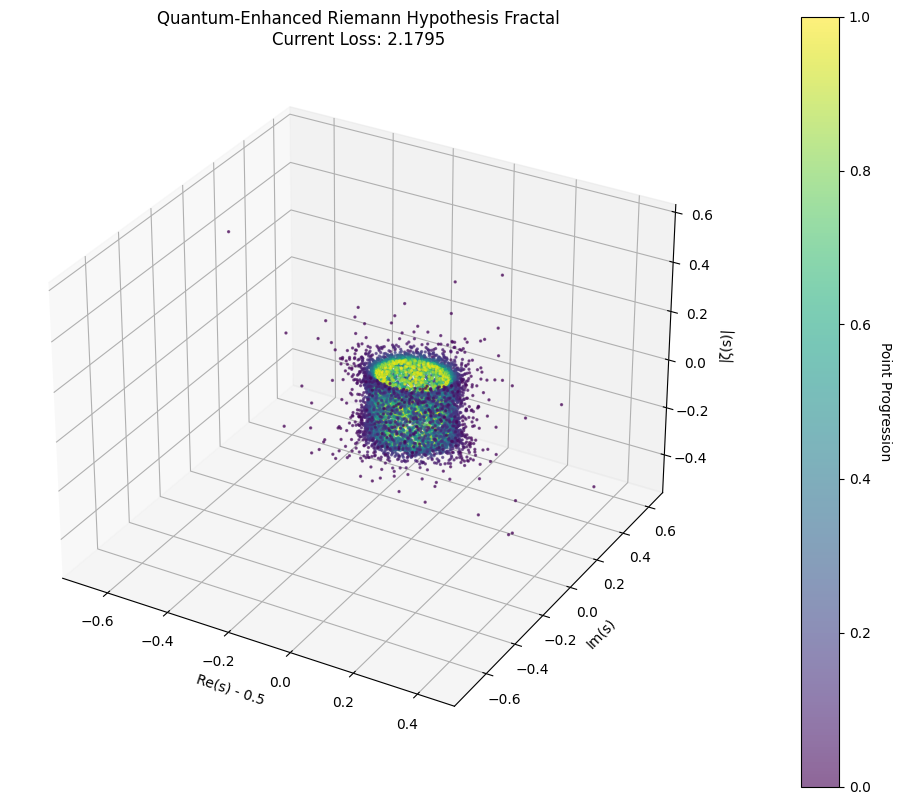

Execution time: 94.37 seconds
Total points: 10000


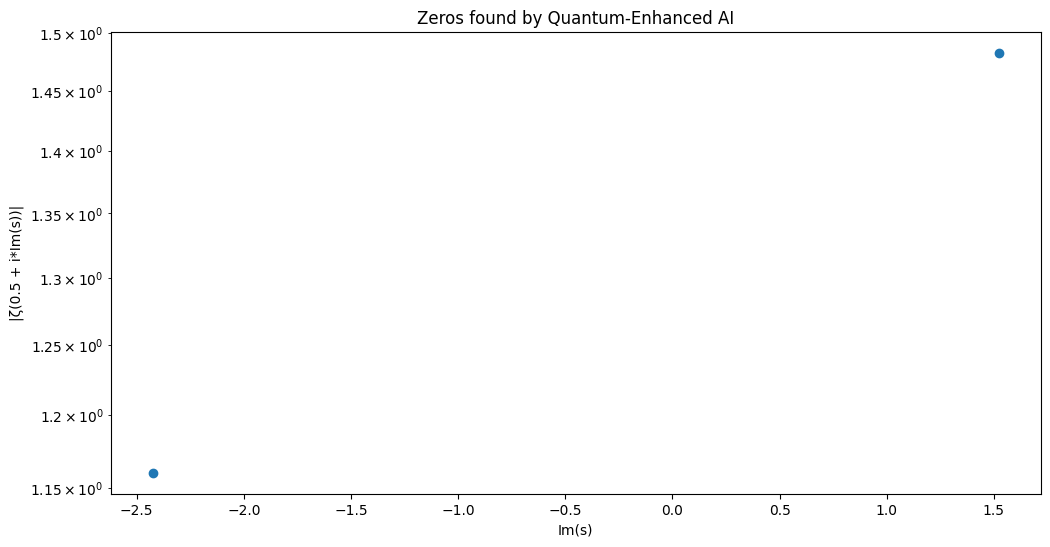

In [14]:
# !pip install cirq matplotlib numpy torch

import matplotlib.pyplot as plt
import numpy as np
import torch
import time
import cirq
from mpl_toolkits.mplot3d import Axes3D
from typing import List, Tuple

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class QuantumRiemannAI:
    def __init__(self, terms=2, qubits=1):
        self.terms = terms
        self.qubits = qubits
        self.zeta_approximation = torch.nn.Parameter(torch.randn(terms, dtype=torch.complex128, device=device))
        self.optimizer = torch.optim.Adam([self.zeta_approximation], lr=0.0001)

        # Known zeros of zeta function
        self.known_zeros = torch.tensor([14.134725, 21.022040, 25.010858, 30.424876, 32.935062, 37.586178, 40.918719], dtype=torch.float64, device=device)

        # Quantum circuit setup
        self.q_regs = [cirq.LineQubit(i) for i in range(self.qubits)]

    def zeta(self, s: torch.Tensor) -> torch.Tensor:
        """Quantum-enhanced approximation of the Riemann zeta function."""
        n = torch.arange(1, self.terms + 1, dtype=torch.float64, device=device)
        partial_sum = torch.sum(1 / torch.pow(n[:, None], s), dim=0)

        # Quantum correction
        quantum_correction = self.quantum_correction(s)

        return partial_sum + quantum_correction

    def quantum_correction(self, s: torch.Tensor) -> torch.Tensor:
        """Apply quantum operations to enhance zeta function approximation."""
        circuit = cirq.Circuit()

        # Encode s into quantum state
        for i, qubit in enumerate(self.q_regs):
            # Use only the real part of s for the rotation angle
            angle = float(np.pi * s[i % len(s)].real.item())
            circuit.append(cirq.Ry(rads=angle)(qubit))

        # Apply quantum operations
        for i in range(len(self.q_regs) - 1):
            circuit.append(cirq.CNOT(self.q_regs[i], self.q_regs[i+1]))

        # Measure in the X basis
        circuit.append(cirq.H.on_each(*self.q_regs))
        circuit.append(cirq.measure(*self.q_regs, key='m'))

        # Simulate the circuit
        simulator = cirq.Simulator()
        result = simulator.run(circuit, repetitions=1000)

        # Convert measurement results to correction term
        measurements = result.measurements['m']
        correction = torch.tensor(np.mean(measurements, axis=0), dtype=torch.float64, device=device)
        return torch.sum(correction) / len(self.q_regs)

    def train(self):
        self.optimizer.zero_grad()
        loss = self.loss_function()
        loss.backward()
        self.optimizer.step()
        return loss.item()

    def loss_function(self) -> torch.Tensor:
        """Calculate the loss based on how well the current approximation satisfies the Riemann hypothesis."""
        s_critical = 0.5 + 1j * self.zeta_approximation.imag
        zeta_values_critical = self.zeta(s_critical)
        loss_critical = torch.mean(torch.abs(zeta_values_critical))

        s_known = 0.5 + 1j * self.known_zeros
        zeta_values_known = self.zeta(s_known)
        loss_known = torch.mean(torch.abs(zeta_values_known))

        return loss_critical + loss_known

    def generate_point(self) -> torch.Tensor:
        """Generate a point based on the current zeta function approximation."""
        return self.zeta_approximation[torch.randint(0, len(self.zeta_approximation), (1,))]

def riemann_fractal(center: Tuple[float, float, float], radius: float, iterations: int) -> List[Tuple[float, float, float]]:
    """Generate a fractal structure inspired by the Riemann hypothesis."""
    points = [center]
    for i in range(1, iterations):
        t = i * np.pi * (3 - np.sqrt(5))
        r = radius / (np.log(i + 2))
        x = center[0] + r * np.cos(t)
        y = center[1] + r * np.sin(t)
        z = center[2] + r * np.sin(2*np.pi*i / np.log(i + 2))
        points.append((x, y, z))
    return points

def plot_riemann_fractal(points: List[Tuple[float, float, float]], ai: QuantumRiemannAI):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    x, y, z = zip(*points)

    colors = plt.cm.viridis(np.linspace(0, 1, len(points)))
    scatter = ax.scatter(x, y, z, c=colors, s=2, alpha=0.6)

    ax.set_xlabel('Re(s) - 0.5')
    ax.set_ylabel('Im(s)')
    ax.set_zlabel('|ζ(s)|')
    plt.title(f"Quantum-Enhanced Riemann Hypothesis Fractal\nCurrent Loss: {ai.loss_function().item():.4f}")

    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
    cbar.set_label('Point Progression', rotation=270, labelpad=15)

    return fig

def main():
    iterations = 10000
    training_epochs = 10000

    start_time = time.time()

    ai = QuantumRiemannAI()
    points = riemann_fractal((0, 0, 0), 1, iterations)

    for epoch in range(training_epochs):
        loss = ai.train()
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    fig = plot_riemann_fractal(points, ai)
    plt.show()

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Execution time: {execution_time:.2f} seconds")
    print(f"Total points: {len(points)}")

    plt.figure(figsize=(12, 6))
    plt.scatter(ai.zeta_approximation.imag.cpu().detach().numpy(),
                torch.abs(ai.zeta(0.5 + 1j * ai.zeta_approximation.imag)).cpu().detach().numpy())
    plt.xlabel('Im(s)')
    plt.ylabel('|ζ(0.5 + i*Im(s))|')
    plt.title('Zeros found by Quantum-Enhanced AI')
    plt.yscale('log')
    plt.show()

if __name__ == "__main__":
    main()